In [123]:

import time
import os
import os
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score

In [124]:
def load_csv(file_name):
    df=pd.read_csv(file_name)
    return df

In [125]:
file_name = '.' + os.sep + 'work' + os.sep + 'Houses.csv'
df2 = load_csv(file_name)
display(df2)

,type,price,room,floor,nhood,street,city
0,דירה,"3,100,000 ₪",3.0,קרקע,מרכז,הקונגרס,תל אביב יפו
1,דירה,"2,225,000 ₪",4.5,2,דרום מערב,בר יהודה,בת ים
2,דירה,"700,000 ₪",3.5,3,קריית שמואל,ביאליק,טבריה
3,דירה,"3,900,000 ₪",4.0,21,נחלת יצחק,הצלע,רמת גן
4,דירה,"2,750,000 ₪",4.0,4,מרכז,הבנים,נס ציונה
...,...,...,...,...,...,...,...
8938,דירה,"1,140,000 ₪",2.5,4,NaN,הרצל,פתח תקווה מרכז
8939,דו משפחתי,"2,150,000 ₪",2.0,קרקע,רמת עמידר,התפוצות,רמת גן
8940,דירה,"1,800,000 ₪",3.5,5,חומת שמואל הר חומה,שמעון בן חמו,ירושלים
8941,דירה,"1,600,000 ₪",4.0,3,מרכז צפון,שרת,נתניה


In [126]:
def count_duplicatives(df, col_name=None):
    res = df.duplicated(keep='first').sum()
    # print(df.duplicated(keep="first").count())
    if col_name:
        res = df[col_name].duplicated(keep='first').sum()

    return (res)

In [127]:
res_dup= count_duplicatives(df2, col_name=None)
print(res_dup)

3167


In [128]:
def remove_duplicatives(df, col_name=None):
    res_df=df.drop_duplicates(keep='first')
    if col_name:
        res_df=df.drop_duplicates(subset=col_name,keep='first')
    return res_df

In [129]:
df=remove_duplicatives(df2, col_name=None)

In [130]:
display(df)

,type,price,room,floor,nhood,street,city
0,דירה,"3,100,000 ₪",3.0,קרקע,מרכז,הקונגרס,תל אביב יפו
1,דירה,"2,225,000 ₪",4.5,2,דרום מערב,בר יהודה,בת ים
2,דירה,"700,000 ₪",3.5,3,קריית שמואל,ביאליק,טבריה
3,דירה,"3,900,000 ₪",4.0,21,נחלת יצחק,הצלע,רמת גן
4,דירה,"2,750,000 ₪",4.0,4,מרכז,הבנים,נס ציונה
...,...,...,...,...,...,...,...
5908,דירה,"1,140,000 ₪",2.5,4,NaN,הרצל,פתח תקווה מרכז
5909,דו משפחתי,"2,150,000 ₪",2.0,קרקע,רמת עמידר,התפוצות,רמת גן
5910,דירה,"1,800,000 ₪",3.5,5,חומת שמואל הר חומה,שמעון בן חמו,ירושלים
5911,דירה,"1,600,000 ₪",4.0,3,מרכז צפון,שרת,נתניה


In [131]:
def remove_corrupt_rows(df):
    res1=df.dropna()
    return res1

In [132]:
df3=remove_corrupt_rows(df)
df3.info()
display(df3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4748 entries, 0 to 5912
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    4748 non-null   object 
 1   price   4748 non-null   object 
 2   room    4748 non-null   float64
 3   floor   4748 non-null   object 
 4   nhood   4748 non-null   object 
 5   street  4748 non-null   object 
 6   city    4748 non-null   object 
dtypes: float64(1), object(6)
memory usage: 296.8+ KB


,type,price,room,floor,nhood,street,city
0,דירה,"3,100,000 ₪",3.0,קרקע,מרכז,הקונגרס,תל אביב יפו
1,דירה,"2,225,000 ₪",4.5,2,דרום מערב,בר יהודה,בת ים
2,דירה,"700,000 ₪",3.5,3,קריית שמואל,ביאליק,טבריה
3,דירה,"3,900,000 ₪",4.0,21,נחלת יצחק,הצלע,רמת גן
4,דירה,"2,750,000 ₪",4.0,4,מרכז,הבנים,נס ציונה
...,...,...,...,...,...,...,...
5907,דירה,"480,000 ₪",4.0,2,נתן אלבז,נתן אלבז,שלומי
5909,דו משפחתי,"2,150,000 ₪",2.0,קרקע,רמת עמידר,התפוצות,רמת גן
5910,דירה,"1,800,000 ₪",3.5,5,חומת שמואל הר חומה,שמעון בן חמו,ירושלים
5911,דירה,"1,600,000 ₪",4.0,3,מרכז צפון,שרת,נתניה


In [133]:
replace_map2 = {'וילה':7,'יחידת דיור':10,'דירת סטודיו':10,'מרתף':10,'קראוון':11,'לופט':12,'דירה להחלפה':0,
                'חניה':0,'קרקע':0,'פרטר':0,'מגרש למגורים':8,'נחלה':8,'מיני פנטהאוז':9,'דירה':1,'דירת גג':2,
                'פנטהאוז':2,'דירת גן':3,'בית פרטי':4,'דו משפחתי':4,'קוטג':4,'טריפלקס':5,'דופלקס':5,'Beer sheva':0,'משק חקלאי':6}

#1-North dist
#2-Haifa dist
#3-South dist
#4-Merkaz dist
#5-Jeruz dist
#6-Tel aviv dist

replace_map3={'בת ים':6, 'טבריה':1,'כטבריה':1,'טבר':1, 'רמת גן':6,'רמת גן קריניצי':6, 'נס ציונה':4, 'תל אביב יפו':6,'תל אביב יפובT':6
              ,'תל אביב - יפו':6,'5טבריה':1,'תלאביב יפו':6,'תל אביב יפ':6,'תל אביב- הצפון הישן':6,'תל אביב יפוב':6,'רחובות':3,
       'חדרה':2, 'לוד':4,'גני אביב לוד':4,'ףלוד':4, 'חריש':2, 'ראשון לציון':4,'ראשון לציוןואי':4, 'נשר':2, 'באר שבע':3, 'עכו':1,
       'חולון':6,'קרית אילון, חולון':6, 'חיפה':2,'חיפ':2,'חיפה':2,'חיפה':2,'חיפה הדר':2, 'באר יעקב':4, 'פתח תקווה':4, 'אור עקיבא':2, 'אופקים':3,
       'רמת-גן':6,'Hadera':2, 'קרית ארבע':0, 'נתניה':4, 'נתיבות':3, 'Uירושלים':5,'ירושלים':5,'ירושליםU':5, 3:'Beer sheva',
       'אשקלון':3,'Myאשקלון':3, 'אשדוד':3, 'גבעתיים':6, 'עפולה':1,'עפלה עילית':1, 'רחובות החדשה':4, 'אור יהודה':6,
       'רמלה':4, 'בני ברק':6,'בני ברק , פרדס כץ':6, 'מצפה רמון':3,'Tנהריה':1,'נהריה':1,'נהריה':1, 'נהרייה':1, 'קרית ביאליק':2,
       'ופתח תקווה':4,'Petsch Tikva':4,'קרית טבעון':2, 'קרית מוצקין':2, 'קרית שמונה':1, 'קרית מלאכי':3,
       'מודיעין מכבים רעות':4, 'קרית גת':3,'קרית גת לכיש':3, 'בית שמש':5, 'רחיפה':2, 'ניו יורק':0,
       'קריית מוצקין':2, 'יבנה':4, 'טירת כרמל':2,'טירה':0,'טירת הכרמל':2, 'בנימינה':2, 'ביתר עילית':0,
       'אילת':3, 'ערד':3,'יהוד מונוסון':4, 'צפת':1,'קריית אתא':2,'ץקרית אתא':2,'ץקרית אתא5':2, 'קרית אתא':2,
       'קציר חריש':2, 'קרית חיים':2,'קרית חיים מערבית':2, 'אפרת':0, 'ירוחם':3, 'קרית אונו':6,
       'גבעת שמואל':4, 'אלעד':4, 'חולו':6, 'ראש העין':4, 'מעלות תרשיחא':1,
       'כפר יונה':4,'Rosh HaAyin':4, 'כרמיאל':1, 'רחובו':4, 'יבנאל':0, 'פסגת זאב':5,
       'מזכרת בתיה':4,'hifa':2,'נווה מונוסון':4, "בני עי''ש":0, 'פרדס חנה - כרכור':0,
       'כפר סבא':4, 'רעננה':4, 'צור יצחק':4, 'רכסים':0, 'גני תקווה':4, 'שדרות':3,
       'בת -ים':6,'³בת ים':6, 'הרצליה':6,'הרצליה נווה עמל':6, 'מעלה אדומים':5,'כפר אדומים':5, 'אזור':6, 'יירושלים':5,'ירושליםU':5,'ירושלים גילה':5,'ירושליים':5, 'ק.מלאכי':3,
       'פתח תקווה':4,'jerusalem':5,'שוהם':4, 'נהריה':1, 'מבשרת ציון':5, 'ראשון':4,
       'הרצליה פיתוח':6,'tsfad':1,'קירית ים':2, 'רמת השרון':6, 'מוצא עילית':0, 'טבאר שבע':3,
       'רמת בית שמש':5, 'יפו':6,'קיסריה':2,'באר טוביה':3, 'יקנעם עלית':1,'יקנעם':1, 'קרית ים':2, 'תל אביב':6, 'אריאל':0,
       "ג'בע מצפון לירושלים":5,'בית-דגן':4, 'יוסף טל':0, 'רמות א':0, 'קריית מלאכי':3,
       'נתניה אזורים':4, '⁹אשדוד':3, 'יהוד מונסון':4, 'תל-אביב':6, 'בתים':6, 'יהוד':4,
       'נוף הגליל':0, 'קדימה צורן':4,'יהוד-מונוסון':4, 'גבעת זאב':0, 'מגדל העמק':1,
       'אלפי מנשה':0, 'תל א אביב':6, 'ברכפלד':0, 'פ"ת':4, 'דימונה':3, 'הוד השרון':4,
       'דאלית אל כרמל':0, 'בת-ים':6, 'ביתשמש':5, 'קריית גת':3, 'תל אב':6, 'באר-שבע':3,
       'פתח תקוה':4,'יוקנעם':1,'להבים':3, 'ראשון ךציון':4, 'גדרה':4,'מטולה':1, 'ירושלם':5, 'אשדודד':3
              ,'חצור הגלילית':0, 'אורנית':0,'כפר תבור':0,'ספיר':0,'מרכז':0,'מיתר':0,'בוסתן הגליל':0,
              'עלמון':0,'צוקים':0,'רוממה':0,'מזור':0,'ברקן':0,'בית אריה עופרים':0,'אירוס':0,'לימן':0,
              'משמרות':0,"ניל''י":0,'יגל':0,'שבות רחל':0,'בחר':0,'כפר חנניה':0,'ענב':0,'נווה ימין':0,
              'רמת השר':0,'גבעת אבני':0,'יקיר':0,'כורזים':0,'נווה אילן':0,'חד נס':0,'חבר':0,'סביון':4,
        'אבן יהודה':0,'בת חפר':2,'הר גילה':0,'זכרון יעקב':2,'כפר ורדים':0,'נצרת עילית':0,'צור הדסה':0,
        'קצרין':1,"נווה אטי''ב":0,'אפיק':0,'נווה אטיב':0,'בית זית':0,'נוה חוף':0,'עומר':0,
        'כפר סאלד':0,'Beer sheva':3,'קרית עקרון':4,'תלקרית עקרון':4,'רבבה':0, 'ןאשקלון':3,'אשקלון':3,'בני יהודה':0,'רחלים':0,'אור הנר':0,
        'מזרעה':0,'כפר חיטים':0,'בית עזרא':0,'תנובות':0,'שומרה':0,'אבטליון':0,'אשלים':0,'אדמית':0,'מצפה שלם':0,
        'עין דור':0,'בורגתה':0,'קליה':0,'פורייה - נווה עובד':0,'קדומים':0,'אליכין':0,'שלומית':0,'שבי ציון':0,'עין שריד':0,'אבני חפץ':0,
        'אחוזת ברק':0,'ניר עקיבא':0,'משמר איילון':0,'תל ציון':0,'פורייה - נווה עופד':0,'אשק':0,'תפרח':0,'כפר ויתקין':0,'אבן מנחם':0,
        'באר גנים':0,'נוב':0,'פוריה נווה עוב':0,'רוחמה':0,'עלי זהב':0,'ירחיב':0,'מבוא ביתר':0,'מרכז שפירא':0,'צור משה':0,'קלנסווה':0,
        'נווה אפק הצבאית':0,'קרית היובל':0,'וולינגרד , בולגריה':0,'עתלית':0,'הולנד':0,'גילון':0,'כרכום':0,'באקה אלגרביה':0,'יונתן':0,
        'מצפה יריחו':0,'בולגריה':0,'הר אדר':0,'שערי תקווה':0,'מושב שורש':0,"תלמי ביל''ו":0,'גבעת יואב':0,'ניצן':0,'ישובי השומרון':0,
        'בארותיים':0,'הולנדU':0,'שושנת העמקים':0,'ישע':0,'שריגים':0,'הדר יוסף':0,'בר גיורא':0,'גבעתי':0,'רמת פולג':0,'כפר חסידים':0,
        'רמת מוצא':0,'עמנואל':0,'נחושה':0,'Болгария':0,'מתתיהו':0,'ספסופה':0,'כוכב יעקב':0,'צפון הישן':0,'בני ציון':0,
        'אשדות יעקב איחוד':0,'כפר מונש':0,'רמת צבי':0,'עלמון ענתות':0,'כפר שמאי':0,'בית חורון':0
        ,'שלומי':0,'Essaouira':0,'מועצה איזורית':0,'אביחיל':0,'מושב שער אפרים':0,'עראבה':0
        ,'מירון':0,'גן יבנה':4,'מדגל העמק':1,'בית אל':0,'תל תאומים':0,'בלינסון':0,'אבן שמואל':0,
        'אלון שבות':0,'מושב כרמל':0,'בית אריה':0,'נווה זוהר':0,'בית אלעזרי':0,'פוריה נווה עובד':0,
        'רמת ישי':0,'גבע בנימין (אדם)':0,'כפר מעש':0,'תל מונד':0,'אלון':0,'גיתה':0,'שני ליבנה':0,'בארותיים':0,'מעין ברוך':0,'יובלים':0,
              'בארותיים':0,'משמר הירדן':0,'קלע -רמת הגולן':1,'בארותיים':0,'שיכוני המיזרח':0,'נצרת':0,
              'חומת שמואל':0,'Tel Aviv':6,'פרדס חנה':0,'בארותיים':0,'Tel aviv':6,'בית חשמונאי':4,'רמת חן':0,
              'ראש פינה':0,'בארותיים':0,'קריית שמואל':2,'קרית שמואל חיפה':2,'רמות רמז':0,'פרדס חנה-כרכור':0,
              'דורות':0,'שדה צבי':0,'reפתח תקווה':4,'גני מודיעין':4,'מודיעין עילית':4,'כפר גנים':0,'איתמר':0,
              'גבעת עדה':0,'פרדסיה':0,'נווה חוף':0,'מורן':0,'קו הים':0,'הודיה':0,'נעלה':0,'עפרה':0,'כוכב יאיר':4,'חירבת חורה':0,
        'קרני שומרון':0,'בית שאן':1,'חשמונאים':0,'Herzilya':6,'קריית ביאליק':2, 'קריית ים':2}

#1-North dist
#2-Haifa dist
#3-South dist
#4-Merkaz dist
#5-Jeruz dist
#6-Tel aviv dist

df5=df3.copy()
df5.replace(replace_map2,inplace=True)
df5.replace(replace_map3,inplace=True)
df5.drop(index=df5[df5['type'] =='Beer sheva'].index,inplace=True)
df5.drop(index=df5[df5['room'] =='Beer sheva'].index,inplace=True)

#print(df5['type'].unique())
#df13=df5['city'].unique()
#df5=df5[df5['floor']>1]
#df5=df5[df5['type']==1]
df5["price"]=df5["price"].str.replace('$','')
df5["price"]=df5["price"].str.replace('₪','')
df5["price"]=df5["price"].str.replace(' ','')
df5["price"]=df5["price"].str.replace(',','')
df5["floor"]=pd.to_numeric(df5.floor)
df5["room"]=pd.to_numeric(df5.room)
df5["price"]=pd.to_numeric(df5.price)
df5["city"]=pd.to_numeric(df5.city)
df5["type"]=pd.to_numeric(df5.type)
df5.drop(index=df5[df5['city'] ==0].index,inplace=True)
df5=df5[df5['floor']>2]
df5=df5[df5['floor']<25]
df5=df5[df5['room']<9]

df5.drop(index=df5[df5['price'] <500000].index,inplace=True)
df5.drop(index=df5[df5['price'] >4000000].index,inplace=True)
display(df5)
df5.info()

C:\Users\AA9A~1\AppData\Local\Temp/ipykernel_18560/655922356.py:82: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df5["price"]=df5["price"].str.replace('$','')


,type,price,room,floor,nhood,street,city
2,1,700000.0,3.5,3,2,ביאליק,1
3,1,3900000.0,4.0,21,נחלת יצחק,הצלע,6
4,1,2750000.0,4.0,4,0,הבנים,4
12,1,1740000.0,4.0,3,אבן גבירול,פקיעין,3
14,1,3000000.0,2.5,4,לב תל אביב,מלצ'ט,6
...,...,...,...,...,...,...,...
5893,1,900000.0,3.5,4,ה,הצבי,3
5895,1,1350000.0,5.0,9,סיטי,שדרות דוד בן גוריון,3
5901,1,2000000.0,4.0,3,רמז,באליק,6
5910,1,1800000.0,3.5,5,חומת שמואל הר חומה,שמעון בן חמו,5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 2 to 5911
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    1320 non-null   int64  
 1   price   1320 non-null   float64
 2   room    1320 non-null   float64
 3   floor   1320 non-null   int64  
 4   nhood   1320 non-null   object 
 5   street  1320 non-null   object 
 6   city    1320 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 82.5+ KB


In [134]:
cor_df=df5
cor=cor_df.corr(method='pearson')
print(cor)

           type     price      room     floor      city
type   1.000000  0.172662  0.223867  0.097362  0.039746
price  0.172662  1.000000  0.360366  0.293480  0.510160
room   0.223867  0.360366  1.000000  0.150513 -0.079198
floor  0.097362  0.293480  0.150513  1.000000  0.055229
city   0.039746  0.510160 -0.079198  0.055229  1.000000


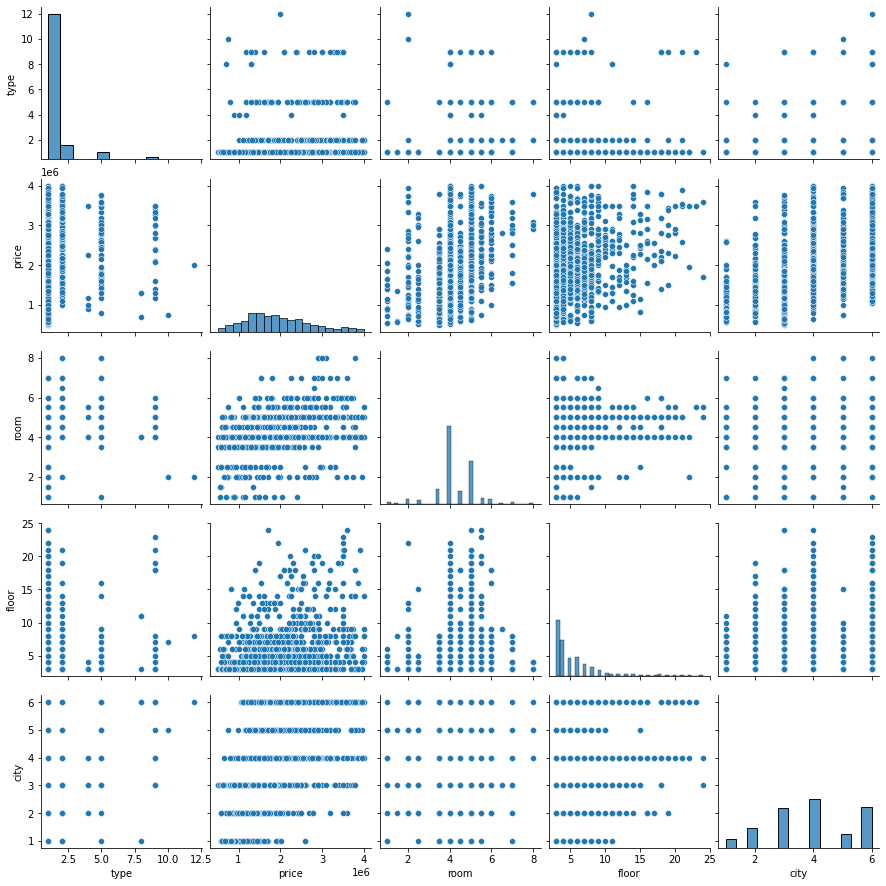

In [135]:
sns.pairplot(df5)

1-North dist
2-Haifa dist
3-South dist
4-Merkaz dist
5-Jeruz dist
6-Tel aviv dist


4    376
6    313
3    307
2    152
5    107
1     65
Name: city, dtype: int64


<AxesSubplot:title={'center':'the connection between price to room'}, xlabel='room', ylabel='price'>

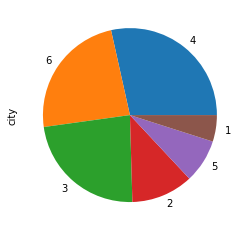

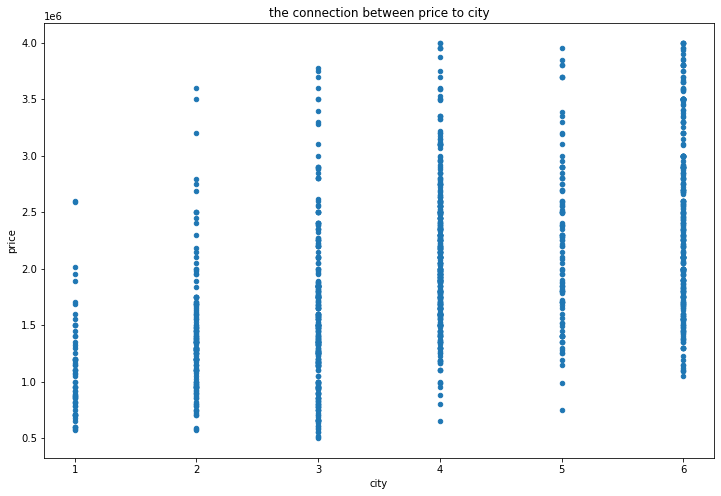

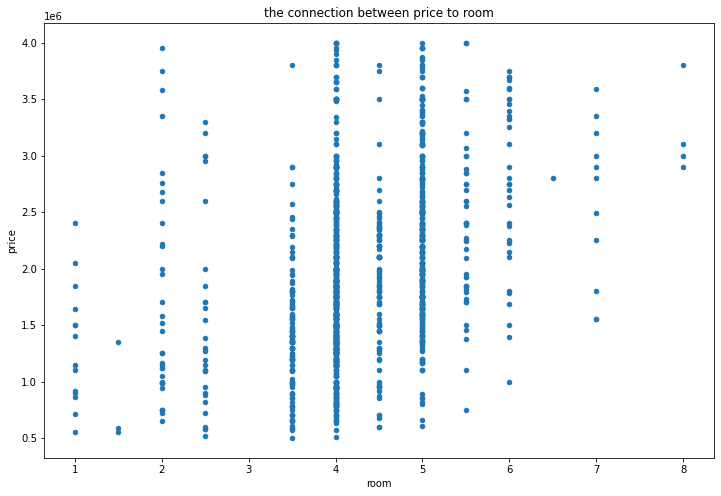

In [136]:
print('1-North dist\n2-Haifa dist\n3-South dist\n4-Merkaz dist\n5-Jeruz dist\n6-Tel aviv dist')
print('\n')
print(df5.city.value_counts())
df5.city.value_counts().plot(kind='pie')
df5.plot.scatter('city','price',figsize=(12,8),title='the connection between price to city')
df5.plot.scatter('room','price',figsize=(12,8),title='the connection between price to room')


<AxesSubplot:title={'center':'the connection between city to floor'}, xlabel='city', ylabel='floor'>

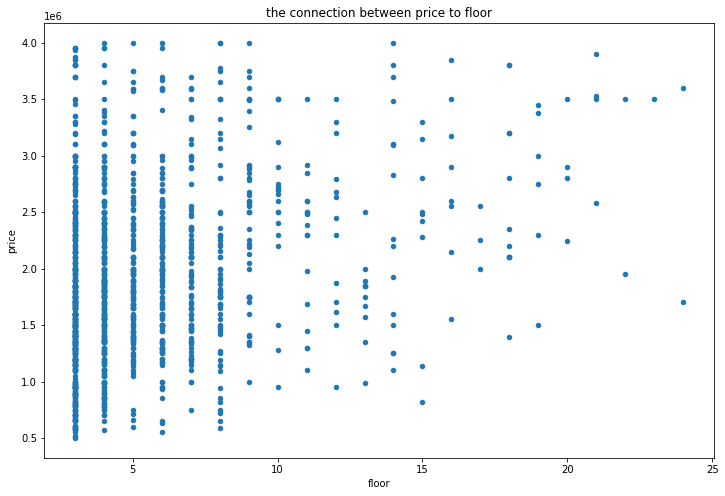

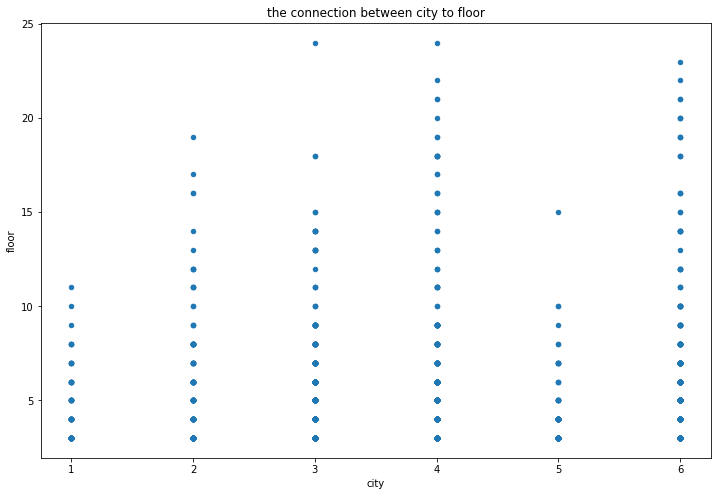

In [137]:
df5.plot.scatter('floor','price',figsize=(12,8),title='the connection between price to floor')
df5.plot.scatter('city','floor',figsize=(12,8),title='the connection between city to floor')


In [138]:
def load_dataset(df, label_column):
    y=df[label_column]
    x=df.drop(label_column,axis=1)
    return x,y

In [139]:
category_col_name = 'price'
X, y = load_dataset(df5, category_col_name)
X2=X[['type','room','floor','city']]                       
display(X2)
display(y)

,type,room,floor,city
2,1,3.5,3,1
3,1,4.0,21,6
4,1,4.0,4,4
12,1,4.0,3,3
14,1,2.5,4,6
...,...,...,...,...
5893,1,3.5,4,3
5895,1,5.0,9,3
5901,1,4.0,3,6
5910,1,3.5,5,5


2        700000.0
3       3900000.0
4       2750000.0
12      1740000.0
14      3000000.0
          ...    
5893     900000.0
5895    1350000.0
5901    2000000.0
5910    1800000.0
5911    1600000.0
Name: price, Length: 1320, dtype: float64

In [140]:
def split_to_train_and_test(X, y, test_ratio, rand_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=rand_state)
    return X_train, X_test, y_train, y_test

In [141]:
X_train, X_test, y_train, y_test = split_to_train_and_test(X2, y, 0.3,45)
display(X_train, X_test)

,type,room,floor,city
4301,1,4.0,4,6
4557,1,4.0,3,3
2224,1,4.0,4,4
5131,1,5.0,3,1
1959,1,4.0,6,6
...,...,...,...,...
2386,1,4.0,3,1
620,1,4.0,7,6
2536,1,4.0,6,3
1676,1,4.0,7,3


,type,room,floor,city
1998,1,4.5,5,4
200,1,5.0,5,6
59,9,5.0,19,6
345,1,5.0,4,3
4542,1,4.0,3,4
...,...,...,...,...
1901,1,5.0,16,4
2464,1,4.0,3,5
1702,1,4.0,4,5
3117,1,4.0,4,4


In [142]:
scaler=preprocessing.StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

In [143]:
def train_1st_model(X_train, y_train):
    m=linear_model.LinearRegression().fit(X_train,y_train)
    return m

In [144]:
def predict_1st(trained_1st_model, X_test):
    return trained_1st_model.predict(X_test)

In [145]:
def evaluate_performance_1st(y_test,y_predicted):
    return metrics.r2_score(y_test,y_predicted)

LinearRegression()
Original precision: 0.49104406135240675
1998    2170000.0
200     3200000.0
59      3450000.0
345     1650000.0
4542    1530000.0
          ...    
1901    2600000.0
2464    2300000.0
1702    1800000.0
3117    1590000.0
1582    1450000.0
Name: price, Length: 396, dtype: float64
1998    1.997982e+06
200     2.708148e+06
59      3.500085e+06
345     1.825922e+06
4542    1.744372e+06
            ...     
1901    2.695724e+06
2464    2.021998e+06
1702    2.071346e+06
3117    1.793720e+06
1582    1.769704e+06
Length: 396, dtype: float64


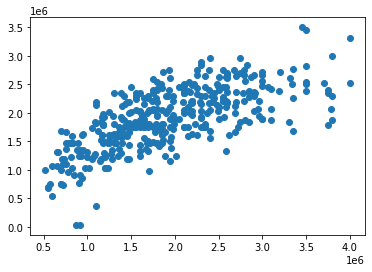

In [146]:
target_col_name = 'price'  
X_1st_train, y_1st_train = X_train_scaled, y_train
X_1st_test, y_1st_test = X_test_scaled, y_test
trained_model_1st = train_1st_model(X_1st_train, y_1st_train)
pred_1st_vals = predict_1st(trained_model_1st, X_1st_test)
y_pred_1st= pd.Series(pred_1st_vals,index=X_1st_test.index)
eval_res_1st = evaluate_performance_1st(y_1st_test, y_pred_1st)

print(trained_model_1st)
print('Original precision:',eval_res_1st)
print(y_1st_test)
print(y_pred_1st)
plt.scatter(y_test,y_pred_1st)

In [147]:
df6=df5.copy()
df6=df6[df6['floor']>2]
df6=df6[df6['floor']<25]
df6=df6[(df6['city']==4)|(df6['city']==3)]
category_col_name = 'price'
X, y = load_dataset(df6, category_col_name)
X2=X[['type','room','floor','city']]                       

X_train, X_test, y_train, y_test = split_to_train_and_test(X2, y, 0.3,45)

scaler=preprocessing.StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)
X_1st_train, y_1st_train = X_train_scaled, y_train
X_1st_test, y_1st_test = X_test_scaled, y_test
trained_model_1st = train_1st_model(X_1st_train, y_1st_train)
pred_1st_vals = predict_1st(trained_model_1st, X_1st_test)
y_pred_1st= pd.Series(pred_1st_vals,index=X_1st_test.index)
eval_res_1st = evaluate_performance_1st(y_1st_test, y_pred_1st)

print(trained_model_1st)
print('After improvment:',eval_res_1st)
print(y_1st_test)
print(y_pred_1st)

LinearRegression()
After improvement: 0.533323444220029
1291    1280000.0
45      2880000.0
3840    2000000.0
2885    3200000.0
3219    1240000.0
          ...    
1367    3500000.0
2963    1485000.0
2387    1650000.0
1619    1500000.0
3101    2350000.0
Name: price, Length: 205, dtype: float64
1291    1.455558e+06
45      2.616495e+06
3840    2.224382e+06
2885    3.012590e+06
3219    1.386659e+06
            ...     
1367    2.508087e+06
2963    1.352210e+06
2387    1.956897e+06
1619    1.922448e+06
3101    2.293281e+06
Length: 205, dtype: float64


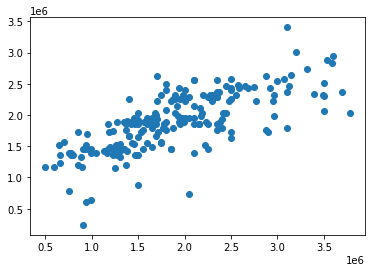

In [148]:
plt.scatter(y_test,y_pred_1st)